In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy
import scipy.interpolate
from classy import Class

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 5, 3
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

In [2]:
models = ['EdS','LCDM']
cosmo = {}
for M in models:
    cosmo[M] = Class()
    cosmo[M].set({'Omega_b':0.05})
    if M=='EdS':
        cosmo[M].set({'Omega_cdm':0.95})
    elif M=='LCDM':
        cosmo[M].set({'Omega_cdm':0.25})
    cosmo[M].compute()

['(.)rho_crit', 'lum. dist.', '(.)rho_b', 'H [1/Mpc]', 'conf. time [Mpc]', 'comov.snd.hrz.', '(.)rho_g', '(.)rho_lambda', 'comov. dist.', '(.)rho_cdm', 'ang.diam.dist.', 'proper time [Gyr]', 'gr.fac. D', 'gr.fac. f', 'z', '(.)rho_ur']
['(.)rho_crit', 'lum. dist.', '(.)rho_b', 'H [1/Mpc]', 'conf. time [Mpc]', 'comov.snd.hrz.', '(.)rho_g', '(.)rho_lambda', 'comov. dist.', '(.)rho_cdm', 'ang.diam.dist.', 'proper time [Gyr]', 'gr.fac. D', 'gr.fac. f', 'z', '(.)rho_ur']


Text(0,0.5,u'$\\mathrm{distance}\\quad (1/H_0)$')

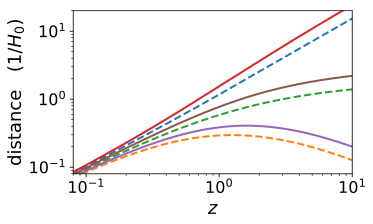

In [3]:
distance_keys = ['lum. dist.','ang.diam.dist.','comov. dist.']
texnames = {'lum. dist.':r'$d_L$','comov. dist.':r'$\chi$','ang.diam.dist.':r'$d_A$',}
for M in models:
    bg = cosmo[M].get_background()
    print bg.keys()
    for key in distance_keys:
        ls='--' if M=='EdS' else '-'
        plt.loglog(bg['z'],bg[key]*cosmo[M].Hubble(0.),label=texnames[key],ls=ls)
plt.xlim([0.08,10])
plt.ylim([0.08,20])
plt.xlabel(r'$z$')
plt.ylabel(r'$\mathrm{distance}\quad (1/H_0)$')

['x_e', 'g [Mpc^-1]', 'conf. time [Mpc]', "kappa' [Mpc^-1]", 'tau_d', 'Tb [K]', 'c_b^2', 'exp(-kappa)', 'z']


/Users/au192734/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.


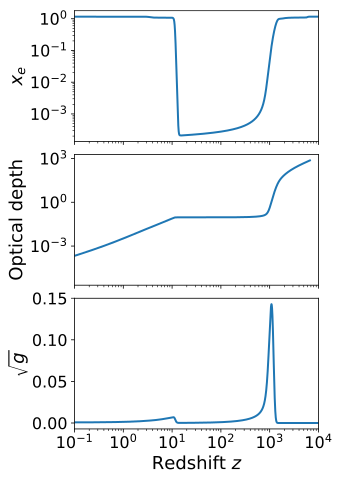

In [4]:
cosmo = Class()
cosmo.compute()
th = cosmo.get_thermodynamics()
print th.keys()
fig, axes = plt.subplots(3,1,figsize=(5,7),sharex=True)
keys = ['x_e',"kappa' [Mpc^-1]",'exp(-kappa)']

z = th['z']
axes[0].loglog(z,th['x_e'],label=r'$x_e$')
axes[1].loglog(z,-np.log(th['exp(-kappa)']),label=r'Optical depth')
axes[2].semilogx(z,np.sqrt(th["kappa' [Mpc^-1]"]*th['exp(-kappa)']),label=r'$\sqrt{g}$')

for j, lab in enumerate([r'$x_e$',r'Optical depth',r'$\sqrt{g}$']):
    axes[j].set_ylabel(lab)
axes[0].set_xlim([0.1,1e4])
axes[-1].set_xlabel(r'Redshift $z$')
fig.tight_layout()
fig.subplots_adjust(hspace=0.1)
fig.savefig('thermoplots.pdf',bbox_inches='tight')

1110.0 236.9504485450238
['a', 'theta_g', 'phi', 'pol0_g', 'theta_b', 'theta_ur', 'shear_ur', 'shear_g', 'tau [Mpc]', 'theta_cdm', 'delta_ur', 'psi', 'pol2_g', 'delta_g', 'delta_cdm', 'pol1_g', 'delta_b']


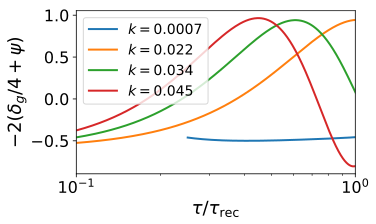

In [5]:
import matplotlib.ticker
k_out = [7e-4, 0.022, 0.034, 0.045]
#k_out = [0.000556054064929, 0.0180717571102, 0.0278027032464, 0.0375336493827]
cosmo = Class()
cosmo.set({'output':'dTk, tCl','k_output_values':str(k_out).strip('[]'),
          'Omega_b':0.06,'h':0.5,'Omega_cdm':0.94,'n_s':1.,
          'gauge':'synchronous','N_ur':3.0,'YHe':0.25})
cosmo.compute()
th = cosmo.get_thermodynamics()
g_th = th["kappa' [Mpc^-1]"]*th['exp(-kappa)']
index_rec = np.argmax(g_th)
z_rec = th['z'][index_rec]
tau_rec = th['conf. time [Mpc]'][index_rec]
print z_rec, tau_rec
pts = cosmo.get_perturbations()['scalar']
print pts[0].keys()
for index_k, k in enumerate(k_out):
    pt = pts[index_k]
    tau = pt['tau [Mpc]']
    #g = np.interp(tau,th['conf. time [Mpc]'],g_th)
    plt.semilogx(tau/tau_rec,-2*(pt['delta_g']/4.+pt['psi']),label=r'$k = '+str(k)+'$')
plt.xlim([0.1,1.0])
plt.legend(ncol=1,loc='upper left')
plt.ylabel(r'$-2(\delta_g/4+\psi)$')
plt.xlabel(r'$\tau/\tau_\mathrm{rec}$')

loc, labels = plt.xticks()
#plt.minorticks_off()

lab = plt.gca().xaxis.get_minorticklabels()
for ll in lab:
    ll.set_visible(False)

['k [1/Mpc]', 'P_scalar(k)', 'P_tensor(k)']


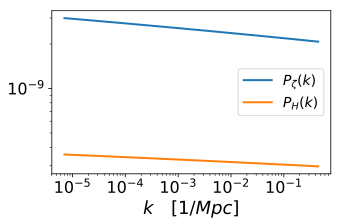

In [6]:
cosmo = Class()
cosmo.set({'output':'tCl', 'modes':'s,t', 'P_k_ini type':'inflation_V_end', 
          'Vparam0':0,'Vparam1':0, 'Vparam2':1.6e-12, 'Vparam3':0,'Vparam4':0, 
           'ln_aH_ratio':55, 'primordial_verbose':2})
cosmo.compute()
pm = cosmo.get_primordial()
print pm.keys()
plt.loglog(pm['k [1/Mpc]'],pm['P_scalar(k)'],label=r'$P_\zeta(k)$')
plt.loglog(pm['k [1/Mpc]'],pm['P_tensor(k)'],label=r'$P_H(k)$')
plt.xlabel(r'$k\quad[1/Mpc]$')
plt.legend()

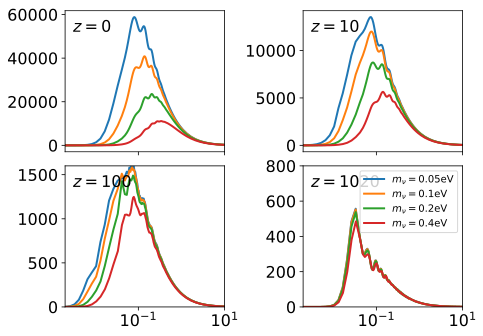

In [7]:
masses = [0.05, 0.1, 0.2, 0.4]
A_s = 2.1e-9
n_s = 0.96
cosmo = {}
for m in masses:
    cosmo[m]=Class()
    cosmo[m].set({'output':'dTk, vTk, mPk','N_ncdm':1,'m_ncdm':m,'z_pk':'1050,0.0',
                 'P_k_max_h/Mpc':10, 'A_s':A_s,'n_s':n_s})
    cosmo[m].compute()
    
    
zvec = [0, 10, 100, 1020]
fig, axes = plt.subplots(2,2,sharex=True,figsize=(7,5))
flataxes = axes.flat
for iz, z in enumerate(zvec):
    ax = flataxes[iz]
    
    for m in masses:
        tk = cosmo[m].get_transfer(z)
        #print tk.keys()
        k = tk['k (h/Mpc)']*cosmo[m].h()
        prim = A_s*(k/0.05)**(n_s-1.)
        ax.semilogx(tk['k (h/Mpc)'],prim*tk['t_ncdm[0]']**2/k**2*(3e5)**2,label=r'$m_\nu='+str(m)+'\mathrm{eV}$')
    ax.set_xlim([2e-3,10])
    ax.text(0.05, 0.85,r'$z='+str(z)+'$', horizontalalignment='left',transform=ax.transAxes)
axes[1,1].legend(loc='upper right',fontsize=10)
axes[1,0].set_ylim([0,1600])
axes[1,1].set_ylim([0,800])
fig.tight_layout()
fig.subplots_adjust(hspace=0.1)

['pp', 'ell', 'bb', 'ee', 'tt', 'tp', 'te']


(2, 2500)

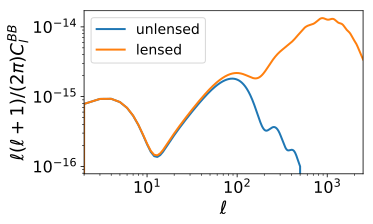

In [9]:
cosmo = Class()
cosmo.set({'output':'tCl,pCl,lCl','lensing':'yes','modes':'s,t','r':'0.2'})
cosmo.compute()

raw_cl = cosmo.raw_cl()
lensed_cl = cosmo.lensed_cl()
lr = raw_cl['ell']
factor_raw = lr*(lr+1)/(2*np.pi)
ll = lensed_cl['ell']
factor_lensed = ll*(ll+1)/(2*np.pi)
print raw_cl.keys()
plt.loglog(lr,factor_raw*raw_cl['bb'],label='unlensed')
plt.loglog(ll,factor_lensed*lensed_cl['bb'],label='lensed')
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell(\ell+1)/(2\pi) C_l^{BB}$")
plt.legend(loc='upper left')
plt.xlim([2,2500])